Grouped Bar Charts
==================
A grouped bar chart allows us to plot several columns for a single row in a DataFrame.
In this example we will first plot the demographics for specialized high schools
in our data set.

Then, we will show we we can use aggregates and melt to prepare our data to make
grouped bar charts at the district level. The general pattern for preparing the data
looks like this:

- group your data so that there is one row for each group of columns
- plot only the column for the group and the columns for the bars

In [74]:
import pandas as pd
import numpy as np

# graphs and viz
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from nycschools import schools, ui, exams, nysed


In [2]:
# # load the demographic data and merge it with the ELA data
# df = schools.load_school_demographics()

# # load the data from the csv file
# ela = exams.load_ela()
# #drop the rows with NaN (where the pop is too small to report)
# ela = ela[ela["mean_scale_score"].notnull()]
# ela = df.merge(ela, how="inner", on=["dbn", "ay"])
# ela = ela.query("ay == 2018 and category == 'All Students'")


Grouped Bar Chart
---------------------------

Here we're going to plot the demographic data for Stuvesant, Bronx Science, and Brooklyn Tech
high schools. These three schools' admissions are set by NYS law to be based on scores on the SHSAT
exam. Other schools also use this exam for admissions, but NYC DOE can change the criteria for the
other "specialized" schools without seeking permission from NYS.

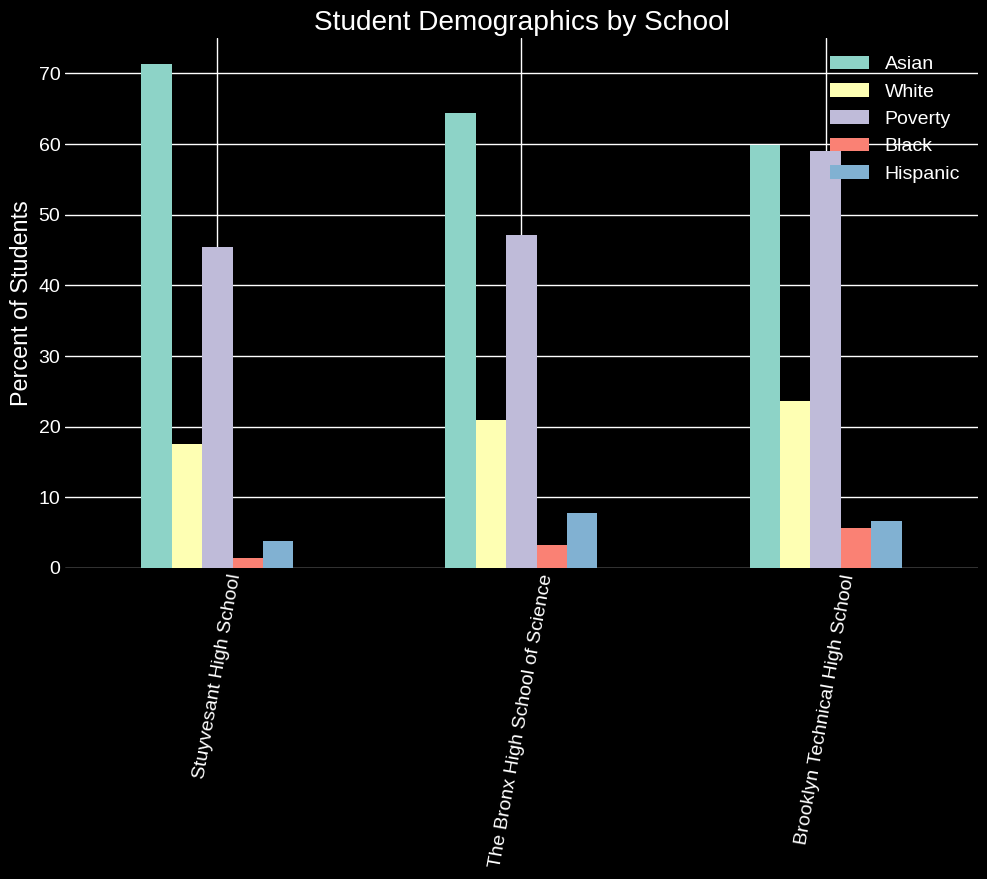

In [23]:
df = schools.load_school_demographics()
plt.style.use('dark_background')
# find the schools by their dbn
dbn =["02M475", "13K430", "10X445"]
data = df[df["dbn"].isin(dbn)]
data = data[data["year"] == data.year.max()]

# get the columns we want and rename them for the graph
cols = ['school_name', 'asian_pct', 'white_pct',
        'poverty_pct', 'black_pct', 'hispanic_pct']
pretty_cols = ['School', 'Asian', 'White', 'Poverty', 'Black', 'Hispanic']
data = data[cols]
data.columns = pretty_cols

# convert the real numbers to percentages
for col in pretty_cols[1:]:
    data[col] = data[col].apply(lambda x: x * 100)

fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()
_ = data.plot(ax=ax, kind="bar", x="School", stacked=False, 
                rot=80, title="Student Demographics by School", xlabel="", ylabel="Percent of Students")



In [56]:
# now plot mean test scores by district
# df = schools.load_school_demographics()
scores = nysed.load_nyc_nysed()
# scores = scores.drop(columns=["school_name","total_enrollment"])
# data = df.merge(scores, how="inner", on=["beds", "ay"])
scores.category.unique()

array(['All Students', 'Female', 'Male', 'Not SWD', 'SWD', 'Asian',
       'Black', 'Hispanic', 'White', 'Econ Disadv', 'Not Econ Disadv',
       'Current ELL', 'Never ELL', 'Not in Foster Care', 'Homeless',
       'Not Homeless', 'Not Migrant', 'Parent Not in Armed Forces',
       'Multiracial', 'American Indian or Alaska Native',
       'In Foster Care', 'Not English Language Learner',
       'Asian or Pacific Islander', 'Migrant',
       'Not Limited English Proficient', 'Limited English Proficient',
       'Parent in Armed Forces'], dtype=object)

In [72]:
data = nysed.load_nyc_nysed()
data = data[data.exam == "ela"]

data = data[data.category.isin(
    ["All Students", "SWD"])]



data = data[['test_year', 'exam', 'category', 'mean_scale_score']].groupby(
    ['test_year', 'category', 'exam']).mean()

data = data.reset_index()
data


,test_year,category,exam,mean_scale_score
0,2016,All Students,ela,305.249764
1,2016,SWD,ela,279.648133
2,2017,All Students,ela,306.917031
3,2017,SWD,ela,281.275277
4,2018,All Students,ela,601.387562
5,2018,SWD,ela,587.745627
6,2019,All Students,ela,600.554132
7,2019,SWD,ela,586.585979
8,2021,All Students,ela,605.042509
9,2021,SWD,ela,591.540566


TypeError: dict() got multiple values for keyword argument 'x'

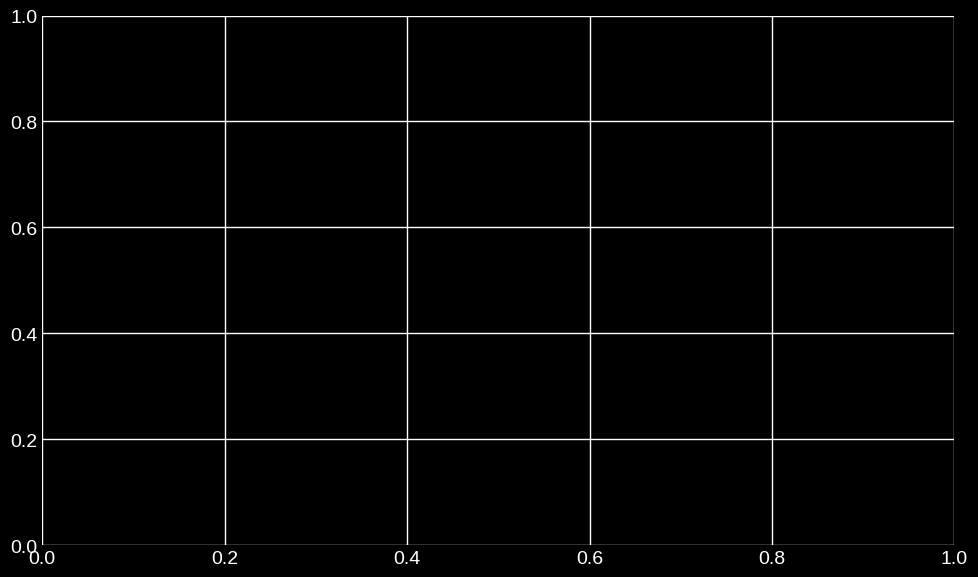

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()

# data.plot(ax=ax, kind="bar", x="School", stacked=False,
#           rot=80, title="Student Demographics by School", xlabel="", ylabel="Percent of Students")

data.plot(ax, kind="bar", x="test_year", y="mean_scale_score", stacked=False,
              title="Mean Scale Scores by Exam", xlabel="", ylabel="Mean Scale Score")



TypeError: Axes.bar() missing 1 required positional argument: 'height'

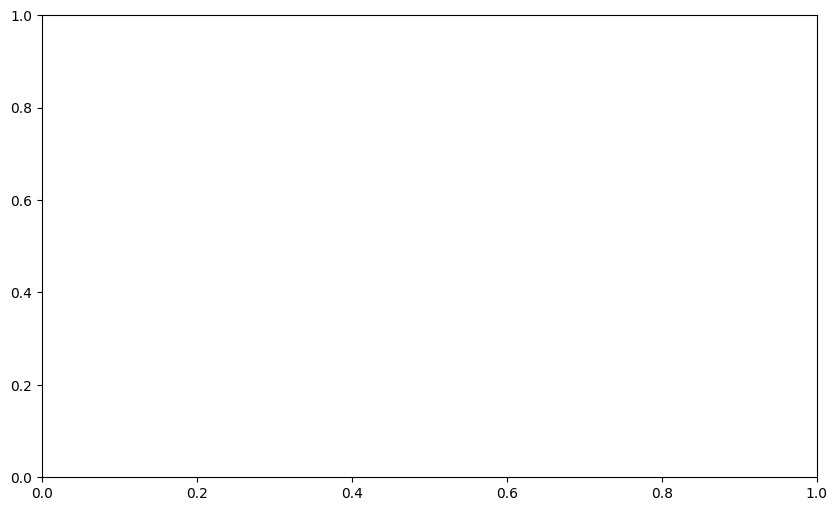

In [31]:
def plot_grouped_bar_chart(df, x_col, group_cols, labels,y_label="", x_label=None, title=""):
    fig, ax = plt.subplots(figsize=(10, 6))
    index = df.index
    bar_width = 0.25
    opacity = 1
    x = np.arrange(len(df))

    for i in range(len(group_cols)):
        rect = ax.bar(df[group_cols[i]], width=bar_width, label=labels[i])

    # for i, bar in enumerate(bar_cols, 1):
    #     ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

    if x_label == None:
        x_label = x_col
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(index + (len(group_cols) - 1) * bar_width / 2)
    ax.set_xticklabels(df[x_col], rotation=85)
    ax.legend()

    y_min, y_max = min(df[group_cols].min()), max(df[group_cols].max())
    ax.set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

plot_grouped_bar_chart(data, "school_name", cols[3:], pretty_cols[3:],y_label="Percent", x_label="", title="Demographics by School")


In [10]:

special["school_name"] = special.apply(lambda row: f"{row.school_name} (n={row.total_enrollment})", axis = 1)
special = special[["school_name", "pct_cat", "pct"]].groupby(["school_name", "pct_cat"]).agg(max)

special = special.reset_index("school_name")
special

KeyError: "['pct_cat', 'pct'] not in index"

In [ ]:
def config_plot(title="", y_label="", size=(12, 9),):
    fig, ax = plt.subplots(figsize=size)

    sns.set_context('talk')

    # Set the y-axis label
    ax.set_ylabel(y_label, labelpad=15)

    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#efefef')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#efefef')
    ax.xaxis.grid(False)

    ax.legend()
    fig.tight_layout()
    ax.set_title(title, pad=40)
    return fig, ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Specialized High School Demographics'}>

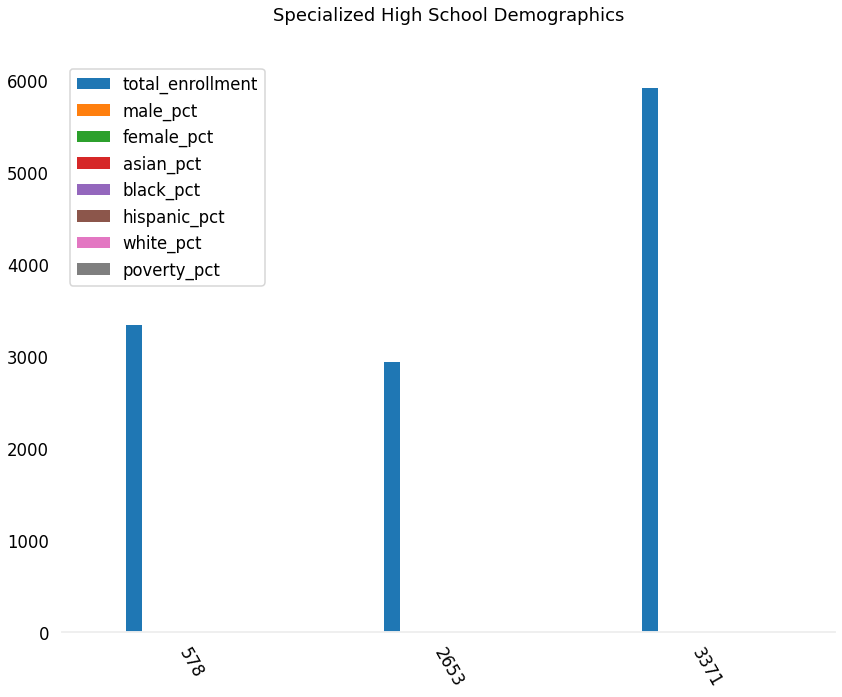

In [140]:

# special = special.drop("dbn", axis=1)
special.groupby("school_name").agg(max)
fig, ax = config_plot(title="Specialized High School Demographics")
special.plot.bar(ax=ax, rot=-60)


In [114]:
dbn =["02M475", "13K430", "10X445"]
special = df[df["dbn"].isin(dbn)]
special = special[special["year"] == special.year.max()]


special[schools.demo.core_cols].columns
cols = ['dbn','school_name', 'total_enrollment', 'male_pct', 'female_pct',
       'asian_pct', 'black_pct', 'hispanic_pct','white_pct', 'poverty_pct']
special = special[cols]

labels = special.school_name.unique()
labels = ["asian", "black"]
bars = [
    special.asian_pct.mean(),
    special.black_pct.mean()
]
speed = [0.1, 17.5, 40, 48, 52, 69, 88]

lifespan = [2, 8, 70, 1.5, 25, 12, 28]

index = ['snail', 'pig', 'elephant',

         'rabbit', 'giraffe', 'coyote', 'horse']



foo = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)

display(special)
data = special.copy()
data.set_index
ax = data.plot.bar(rot=-60)

# for label, bar in bars:
#     r = ax.bar()
# width = .25
# x = np.arange(len(bars))
# fig, ax = config_plot(title="Specialized High School Demographics")


# add the bars
# for i, bar in enumerate(bar_cols, 1):
#     ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

# set the x-ticks to the middle of the bar groups and add labels
#     ax.set_xticks(x + (w * len(bar_cols)) / 2)
# ax.set_xticklabels(data[x_cols])

# add the bars
# for i, bar in enumerate(bar_cols, 1):
#     ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

# set the x-ticks to the middle of the bar groups and add labels
#     ax.set_xticks(x + (w * len(bar_cols)) / 2)
# ax.set_xticklabels(data[x_cols])



SyntaxError: invalid syntax (1785676820.py, line 31)

/tmp/ipykernel_6085/1098052182.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data[x_cols])


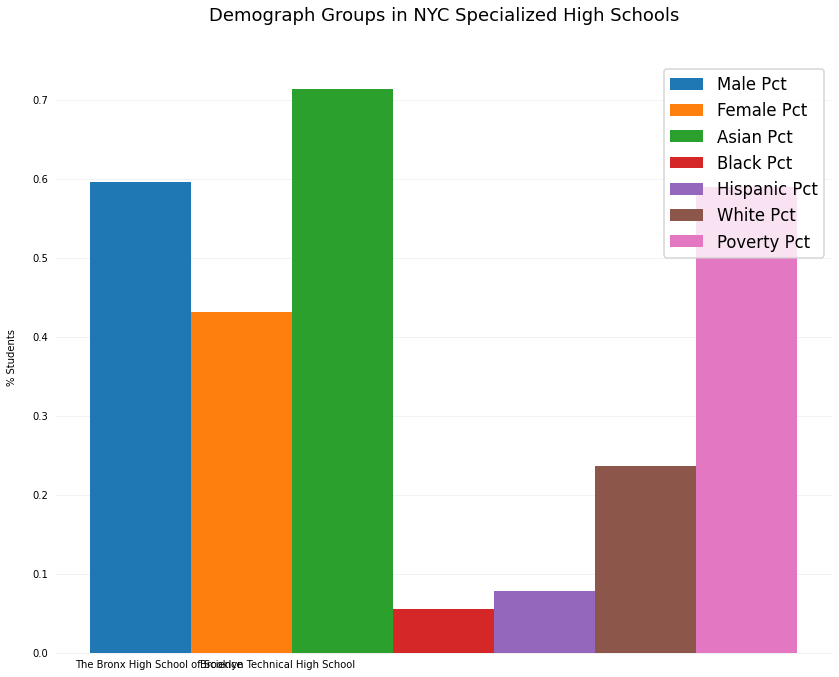

In [65]:
bar_cols = cols[3:]
data = special.copy()
x_label = "school_name"

def plot_group_bars(data, bar_cols, x_cols, y_label, title=""):
    # get the tick marks for the x access
    x = np.arange(len(bar_cols))

    # instead of plotting the dataframe, get the figure and axis components from the plot
    fig, ax = plt.subplots(figsize=(12, 9))

    # the bar width in inches
    w = .17
    
    # add the bars
    for i, bar in enumerate(bar_cols, 1):
#         print(x*i*w)
        ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

    # set the x-ticks to the middle of the bar groups and add labels
#     ax.set_xticks(x + (w * len(bar_cols)) / 2)
    ax.set_xticklabels(data[x_cols])

    sns.set_context('talk')

    # Set the y-axis label
    ax.set_ylabel(y_label, labelpad=15)

    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#efefef')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#efefef')
    ax.xaxis.grid(False)

    ax.legend()
    fig.tight_layout()
    ax.set_title(title, pad=40)
    plt.show()

plot_group_bars(data, cols[3:], "school_name", "% Students", "Demograph Groups in NYC Specialized High Schools")

# x = np.arange(4)
# w = .17
# for bar, i in enumerate(bar_cols, 1):
#     print(x)